In [1]:
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from JanetLSTM import JANET

Using TensorFlow backend.


In [7]:
dataset = read_csv('./data/jobs.csv', header=0, index_col=0)
dataset.drop("job_id", axis=1, inplace=True)
dataset.drop("task_id", axis=1, inplace=True)
values = dataset.values
# 确保所有数据是浮点数类型
values = values.astype('float32')
print(values)
# 对特征标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# 构建成监督学习问题
# reframed = series_to_supervised(scaled, 1, 1)
# print(reframed.head())
# print(values)

[[1.31964462e+02 5.00000000e-01 8.93536583e-03 1.97000000e+02
  0.00000000e+00]
 [5.81428566e+01 5.00000000e-01 7.89480470e-03 7.70000000e+01
  0.00000000e+00]
 [1.09452675e+02 5.00000000e-01 8.99748877e-03 2.43000000e+02
  0.00000000e+00]
 ...
 [7.00000000e+00 5.00000000e-01 8.05529021e-03 2.00000000e+00
  0.00000000e+00]
 [3.90000000e+01 5.00000000e-01 5.73602878e-03 3.00000000e+00
  0.00000000e+00]
 [1.58333337e+00 5.00000000e-01 4.17259894e-03 6.81800000e+03
  0.00000000e+00]]


In [8]:
batch_size = 100
num_classes = 10
epochs = 100
hidden_units = 128
learning_rate = 0.001
train_number = 21000
train = values[:train_number, :]
test = values[train_number:, :]
print(train)
print(test)

[[1.31964462e+02 5.00000000e-01 8.93536583e-03 1.97000000e+02
  0.00000000e+00]
 [5.81428566e+01 5.00000000e-01 7.89480470e-03 7.70000000e+01
  0.00000000e+00]
 [1.09452675e+02 5.00000000e-01 8.99748877e-03 2.43000000e+02
  0.00000000e+00]
 ...
 [1.00000000e+00 5.00000000e-01 4.04835213e-03 1.00000000e+00
  0.00000000e+00]
 [2.07999992e+00 5.00000000e-01 4.12600581e-03 5.00000000e+01
  0.00000000e+00]
 [3.00000000e+00 5.00000000e-01 4.08976804e-03 1.00000000e+00
  0.00000000e+00]]
[[3.6800001e+00 5.0000000e-01 5.7360288e-03 5.0000000e+01 0.0000000e+00]
 [5.0000000e+00 5.0000000e-01 8.0552902e-03 1.0000000e+00 0.0000000e+00]
 [2.7000000e+01 5.0000000e-01 7.7964431e-03 1.0000000e+00 0.0000000e+00]
 ...
 [7.0000000e+00 5.0000000e-01 8.0552902e-03 2.0000000e+00 0.0000000e+00]
 [3.9000000e+01 5.0000000e-01 5.7360288e-03 3.0000000e+00 0.0000000e+00]
 [1.5833334e+00 5.0000000e-01 4.1725989e-03 6.8180000e+03 0.0000000e+00]]


In [9]:
# 切分输入和输出
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# 将输入转换为三维格式 [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
model = Sequential()
model.add(JANET(hidden_units,  input_shape=train_X.shape[1:]))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

rmsprop = Adam(lr=learning_rate, amsgrad=True)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])
model.fit(train_X, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_X, test_y),
          callbacks=[ModelCheckpoint('weights/janet.h5', monitor='val_acc',
                                     save_best_only=True, save_weights_only=True, mode='max')])

(21000, 1, 4) (21000,) (10756, 1, 4) (10756,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
janet_1 (JANET)              (None, 128)               34048     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 35,338
Trainable params: 35,338
Non-trainable params: 0
_________________________________________________________________
Train on 21000 samples, validate on 10756 samples
Epoch 1/100
21000/21000 [==============================] - 1s 70us/step - loss: 0.1663 - acc: 0.9688 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 2/100
21000/21000 [==============================] - 1s 37us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 3/100
21000/21000 [==============================] - 1s 36us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 4/100
21000/21000 

21000/21000 [==============================] - 1s 41us/step - loss: 2.2513e-05 - acc: 1.0000 - val_loss: 1.8300e-05 - val_acc: 1.0000
Epoch 53/100
21000/21000 [==============================] - 1s 35us/step - loss: 2.2039e-05 - acc: 1.0000 - val_loss: 1.7912e-05 - val_acc: 1.0000
Epoch 54/100
21000/21000 [==============================] - 1s 37us/step - loss: 2.1581e-05 - acc: 1.0000 - val_loss: 1.7506e-05 - val_acc: 1.0000
Epoch 55/100
21000/21000 [==============================] - 1s 34us/step - loss: 2.1147e-05 - acc: 1.0000 - val_loss: 1.7184e-05 - val_acc: 1.0000
Epoch 56/100
21000/21000 [==============================] - 1s 36us/step - loss: 2.0731e-05 - acc: 1.0000 - val_loss: 1.6825e-05 - val_acc: 1.0000
Epoch 57/100
21000/21000 [==============================] - 1s 34us/step - loss: 2.0315e-05 - acc: 1.0000 - val_loss: 1.6483e-05 - val_acc: 1.0000
Epoch 58/100
21000/21000 [==============================] - 1s 35us/step - loss: 1.9933e-05 - acc: 1.0000 - val_loss: 1.6176e-05 - 

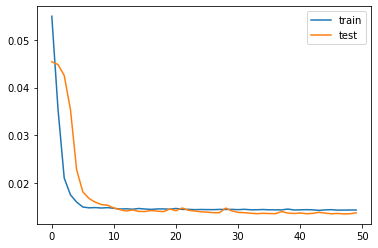

In [147]:
# 绘制损失趋势线
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [148]:
model.load_weights('weights/janet.h5')
scores = model.evaluate(test_X, test_y, verbose=1)
print(scores[0])
print(scores[1])

10756/10756 [==============================] - 0s 44us/step
0.010618279652646475
1.0


In [149]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [150]:
# 预测值反转缩放
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

ValueError: operands could not be broadcast together with shapes (10756,13) (5,) (10756,13) 

In [151]:
# 实际值反转缩放
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
print(inv_y.shape)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

(10756, 4)


ValueError: operands could not be broadcast together with shapes (10756,4) (5,) (10756,4) 

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


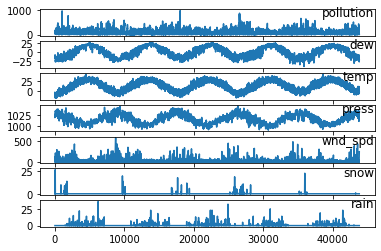

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  
(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)
Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 4s - loss: 0.0549 - val_loss: 0.0454
Epoch 2/50
 - 1s - loss: 0.0355 - val_loss: 0.0448
Epoch 3/50
 - 1s - loss: 0.0211 - val_loss: 0.0425
Epoch 4/50
 - 1s - loss: 0.0176 - val_loss: 0.0354
Epoch 5/50
 - 1s - loss: 0.0160 - val_loss: 0.0228
Epoch 6/5

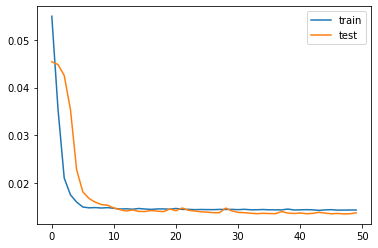

Test RMSE: 26.584


In [136]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate
from keras.layers import LSTM
from math import sqrt

data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv",index_col=0)
data.head()
data.to_csv("raw.csv")

# 加载数据
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
#删除No列
dataset.drop('No', axis=1, inplace=True)
# 修改剩余列名称
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# 将所有空值替换为0
dataset['pollution'].fillna(0, inplace=True)
# 删除前24小时行
dataset = dataset[24:]
# 打印前5行
print(dataset.head(5))
# 保存数据到pollution.csv
dataset.to_csv('pollution.csv')


#方便在浏览器中显示图标
%matplotlib inline
# 加载数据
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# 选择指定列绘图
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# 为每一列绘制图表
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()


# 将数据转换成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# 输入序列(t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# 预测序列(t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# 把所有放在一起
	agg = concat(cols, axis=1)
	agg.columns = names
	# 删除空值行
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# 加载数据
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# 对风向特征整数标签化
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# 确保所有数据是浮点数类型
values = values.astype('float32')
# 对特征标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# 构建成监督学习问题
reframed = series_to_supervised(scaled, 1, 1)
# 删除我们不想预测的天气数据列，只留下pollution列
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

# 切分训练集和测试机
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 切分输入和输出
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# 将输入转换为三维格式 [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# 设计模型
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# 拟合模型
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# 绘制损失趋势线
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# 开始预测
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# 预测值反转缩放
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# 实际值反转缩放
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# 计算均方根误差
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [140]:
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
print(inv_y.shape)
print(yhat.shape)
inv_y = scaler.inverse_transform(inv_y)
print(inv_y)

(35039, 8)
(35039, 1)
[[ 31.        -17.         -7.        ...  75.1         0.
    0.       ]
 [ 20.        -17.         -7.        ...   4.02        0.
    0.       ]
 [ 19.        -17.         -7.        ...   8.94        0.
    0.       ]
 ...
 [ 10.        -22.         -3.0000002 ... 237.78        0.
    0.       ]
 [  8.        -22.         -3.0000002 ... 242.7         0.
    0.       ]
 [ 12.        -22.         -4.        ... 246.72        0.
    0.       ]]


In [5]:
model = Sequential()
model.add(JANET(128,  input_shape=train_X.shape[1:]))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

rmsprop = Adam(lr=learning_rate, amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])
model.load_weights('weights/model.h5')

NameError: name 'train_X' is not defined